In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

2 Linear regression with one variable

In [44]:
datafile='data/ex1data1.txt'
data=np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=False)     #usecols表示需要读取的列，unpack默认为false，如果为true，则数据被转置

In [88]:
#第一部分的数据，拆解为X，第二部分的数据，拆解为y
X=data[:, 0]
y=data[:, 1]
m=y.size   #计算样本的数量

2.1 Plotting the Data

Text(0.5,0,'population')

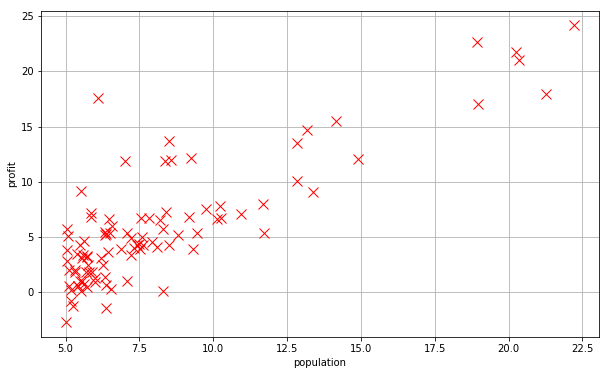

In [58]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'rx',markersize=10)      #rx代表红色的x
plt.grid(True)     #把辅助线画出来
plt.ylabel('profit')
plt.xlabel('population')

2.2 Gradient Descent

In [60]:
# 初始化迭代次数，学习率
iterations=1500
alpha=0.01

In [62]:
# 计算二维矩阵的乘法
def h(theta, X):
    return np.dot(X, theta)

In [63]:
# 计算损失函数
def computeCose(mytheta,X,y):
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T, (h(mytheta,X)-y)))

In [67]:
# theta初始化为值全部为0的列向量，行数=X的样本数量
initial_theta=np.zeros((X.shape[0],1)) 

In [69]:
# 计算初始theta的损失函数值
print(computeCose(initial_theta,X,y))

32.07273387745567


In [99]:
def descendGradient(X, theta_start=np.zeros(2)):
    theta = theta_start
    jvec=[]   #用来保存每一次迭代产生的coss function的值
    thetahistory=[]   #用来保存每一次迭代更新的theta值
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCose(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        
        for j in range(len(tmptheta)):     #此处len计算的应该是矩阵的行数？
            #此处计算新的theta的值
            tmptheta[j]=theta[j] - (alpha/m) * np.sum((h(initial_theta,X) - y) * np.array(X[:, j]))
        
        theta = tmptheta
    return (theta,thetahistory,jvec)

In [100]:
# 初始化theta的值，然后执行梯度下降法
initial_theta=np.zeros((X.shape[0],1))
theta,thetahistory,jvec=descendGradient(X,initial_theta)

IndexError: too many indices for array